# Portfolio Risk Calculation

*   Defines a dictionary of stocks with their respective weights in the portfolio.
*   Specifies the period for which historical data is required.
*   Downloads the historical adjusted closing prices from Yahoo Finance.
*   Computes daily returns for each stock and then calculates the daily portfolio returns based on the weights.
*   Calculates the mean and standard deviation of the daily portfolio returns.
*   Determines the VaR at the specified confidence level using both the percentile method and the parametric method (assuming a normal distribution).
*   Prints out the calculated VaR.
*   Finally, it plots the cumulative returns of the portfolio over the specified period.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm



In [ ]:
# Define the stocks in our portfolio and their respective weights
portfolio_stocks = {
    'AAPL': 0.3,  # 30% of the portfolio
    'MSFT': 0.2,  # 20% of the portfolio
    'GOOG': 0.2,  # 20% of the portfolio
    'AMZN': 0.3   # 30% of the portfolio
}



In [ ]:
# Define the time period for historical data
start_date = '2020-01-01'
end_date = '2023-11-03'

# Fetch the historical data from Yahoo Finance
data = yf.download(list(portfolio_stocks.keys()), start=start_date, end=end_date)['Adj Close']



[*********************100%%**********************]  4 of 4 completed


In [ ]:
# Calculate daily returns
returns = np.log(1+data.pct_change()).dropna()



In [ ]:
# Calculate portfolio returns by multiplying stock returns with their respective weights
portfolio_returns = returns.dot(np.array(list(portfolio_stocks.values())))



In [ ]:
portfolio_returns

Date
2020-01-03   -0.010116
2020-01-06    0.010982
2020-01-07   -0.003869
2020-01-08    0.009530
2020-01-09    0.013185
                ...   
2023-10-27    0.017287
2023-10-30    0.021822
2023-10-31    0.001410
2023-11-01    0.021932
2023-11-02    0.011222
Length: 966, dtype: float64

In [ ]:
# Calculate the mean and standard deviation of daily portfolio returns
mean_returns = portfolio_returns.mean()
sigma_returns = portfolio_returns.std()



In [ ]:
# Set the confidence level
confidence_level = 0.05

# Calculate VaR using the percentile method
VaR = np.percentile(portfolio_returns, confidence_level * 100)



In [ ]:
# Calculate VaR using the parametric method (assuming normal distribution)
VaR_parametric = norm.ppf(confidence_level, mean_returns, sigma_returns)

# Print the results
print(f"Portfolio VaR (percentile method) at {confidence_level * 100}% confidence level: {VaR * 100:.2f}%")
print(f"Portfolio VaR (parametric method) at {confidence_level * 100}% confidence level: {VaR_parametric * 100:.2f}%")



Portfolio VaR (percentile method) at 5.0% confidence level: -2.97%
Portfolio VaR (parametric method) at 5.0% confidence level: -3.10%


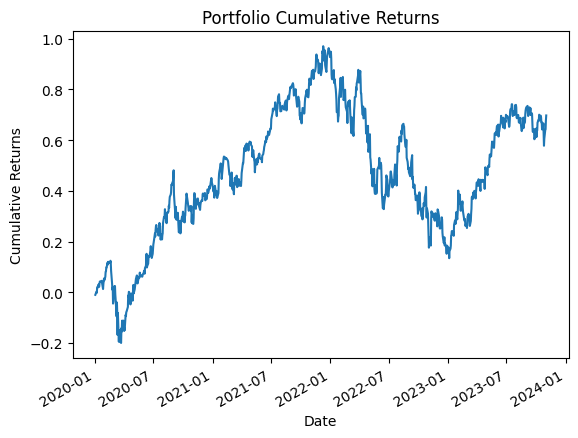

In [ ]:
# Plot the portfolio cumulative returns
import matplotlib.pyplot as plt

cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.plot()
plt.title('Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()


* In practice, financial returns may not follow a normal distribution, and therefore, using the parametric method with normal distribution assumptions might not be accurate.

* In such cases, alternative approaches like Historical Simulation or Monte Carlo Simulation could be employed for a better estimate of VaR.

* Fetches historical stock data over a two-year period to ensure we have a robust dataset.
* Calculates the covariance matrix of the stock returns, which is critical for assessing how the stocks move together.
* Runs a Monte Carlo simulation with 10,000 iterations, simulating the portfolio returns for each day over the next trading year (252 days). This creates a distribution of possible ending portfolio values after a year.
* Uses this distribution to calculate the 95% VaR and CVaR, giving us the value at risk and the expected shortfall (average of the worst 5% of outcomes).
* Visualizes the results with a histogram and lines indicating the VaR and CVaR.

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt



In [ ]:
# Define the stocks and their respective weights in our portfolio
portfolio_stocks = {
    'AAPL': 0.3,
    'MSFT': 0.2,
    'GOOG': 0.2,
    'AMZN': 0.3
}



In [ ]:
# Define the time period for historical data
start_date = '2020-01-01'
end_date = '2023-11-03'

# Fetch the historical data from Yahoo Finance
data = yf.download(list(portfolio_stocks.keys()), start=start_date, end=end_date)['Adj Close']



[*********************100%%**********************]  4 of 4 completed


In [ ]:
# Calculate daily returns
returns = np.log(1+data.pct_change()).dropna()

# Calculate the covariance matrix on daily returns
cov_matrix = returns.cov()



In [ ]:
cov_matrix

,AAPL,AMZN,GOOG,MSFT
AAPL,0.000462,0.000325,0.000319,0.000350
AMZN,0.000325,0.000580,0.000347,0.000343
GOOG,0.000319,0.000347,0.000456,0.000344
MSFT,0.000350,0.000343,0.000344,0.000435


In [ ]:
# Simulate 10,000 potential future portfolio returns using Monte Carlo simulation
num_simulations = 10000
num_days = 252  # Approximate number of trading days in a year
simulated_portfolios = np.zeros(num_simulations)



In [ ]:
# Assuming 'num_simulations' and 'num_days' are defined earlier
# 'portfolio_stocks' should be a dictionary where keys are stock symbols and values are the weights

# Convert portfolio weights to a numpy array
weights = np.array(list(portfolio_stocks.values()))

# Initialize array to store simulated portfolio values
simulated_portfolios = np.zeros(num_simulations)



In [ ]:
for i in range(num_simulations):
    # Randomly sample from a normal distribution for each stock
    simulated_rets = np.random.multivariate_normal(returns.mean().values, cov_matrix, num_days)

    # Calculate the daily portfolio returns by multiplying the simulated returns with the weights
    # Here, we sum across the columns (axis=1) after multiplying each day's returns by the weights
    daily_portf_returns = np.sum((simulated_rets * weights), axis=1)

    # Cumulative sum to simulate the daily returns
    simulated_portf_values = np.cumsum(daily_portf_returns)

    # Store the final simulated portfolio value
    simulated_portfolios[i] = simulated_portf_values[-1]




In [ ]:
simulated_portfolios

array([ 0.46442676,  0.38986159, -0.29472855, ...,  0.20543079,
        0.82153489,  0.25161147])

In [ ]:
# Calculate VaR and CVaR
confidence_level = 0.05
VaR_95 = np.percentile(simulated_portfolios, 100 * confidence_level)
CVaR_95 = simulated_portfolios[simulated_portfolios <= VaR_95].mean()



In [ ]:
# Print the results
print(f"Portfolio VaR at {confidence_level * 100}% confidence level: {VaR_95:.2f}")
print(f"Portfolio CVaR at {confidence_level * 100}% confidence level: {CVaR_95:.2f}")



Portfolio VaR at 5.0% confidence level: -0.32
Portfolio CVaR at 5.0% confidence level: -0.45


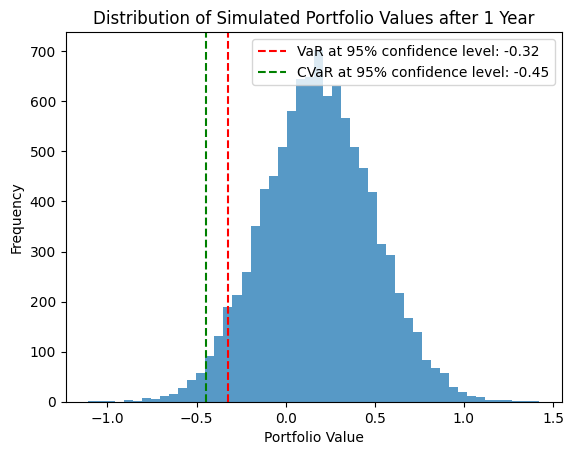

In [ ]:
# Plot the distribution of simulated portfolio values
plt.hist(simulated_portfolios, bins=50, alpha=0.75)
plt.axvline(x=VaR_95, color='r', linestyle='--', label=f'VaR at 95% confidence level: {VaR_95:.2f}')
plt.axvline(x=CVaR_95, color='g', linestyle='--', label=f'CVaR at 95% confidence level: {CVaR_95:.2f}')
plt.title('Distribution of Simulated Portfolio Values after 1 Year')
plt.xlabel('Portfolio Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* This method is more advanced and realistic because it accounts for the non-normal distribution of returns and the correlations between different assets.
* Monte Carlo simulations can model the uncertainty inherent in financial markets more flexibly than parametric approaches based on the normal distribution assumption.

# Real-time Risk Monitoring

* Tracking the performance and exposure of your portfolio and adjusting it dynamically to adhere to your predefined risk parameters.
* In a live trading environment, this would involve subscribing to a real-time data feed and executing trades through a broker's API.

In [7]:
import yfinance as yf
import time
import pandas as pd
import numpy as np
from datetime import datetime



In [8]:
# Define your portfolio with tickers and their corresponding weights
portfolio = {
    'AAPL': 0.4,
    'MSFT': 0.3,
    'GOOG': 0.2,
    'AMZN': 0.1
}

# Set the initial cash investment
initial_investment = 1000000  # $1,000,000

# Maximum allowed portfolio drop in dollars before triggering risk management action
max_drawdown = -50000  # -$50,000



In [9]:
# Function to calculate the current value of the portfolio
def calculate_portfolio_value(prices, weights, investment):
    if isinstance(prices, pd.Series):
        # If 'prices' is a Series, we'll convert it to a DataFrame
        prices = prices.to_frame()

    normalized_prices = prices / prices.iloc[0]  # Normalize prices to the initial prices

    # Ensure weights is a pandas Series with the same index as the prices columns
    weights = pd.Series(weights, index=prices.columns)

    # Calculate the dollar allocation per stock at the start
    allocation = (weights * investment) / prices.iloc[0]

    # Multiply normalized prices with the allocation
    position_values = prices.multiply(allocation, axis='columns')  # Element-wise multiplication

    # Sum across columns to get the total portfolio value over time
    total_position = position_values.sum(axis=1)

    return total_position




In [10]:
# Simulate real-time risk monitoring
try:
    print("Starting real-time risk monitoring...")

    while True:
        # Fetch latest prices for all stocks in the portfolio
        data = yf.download(list(portfolio.keys()), period="1d", interval="5m")
        latest_prices = data['Close'].dropna()

        # Calculate the portfolio's current value
        current_portfolio_value = calculate_portfolio_value(latest_prices, pd.Series(portfolio), initial_investment)

        # Calculate the portfolio's current drawdown
        current_drawdown = current_portfolio_value.iloc[-1] - initial_investment

        print(f"{datetime.now()}: Current Portfolio Value: {current_portfolio_value.iloc[-1]:.2f}")
        print(f"{datetime.now()}: Current Drawdown: {current_drawdown:.2f}")

        # Check if the drawdown exceeds the maximum allowed drawdown
        if current_drawdown < max_drawdown:
            print("Maximum drawdown limit exceeded. Initiate risk management protocols.")
            # Here you would implement your risk management strategy, e.g.:
            # - Reduce position sizes
            # - Hedge with options
            # - Liquidate positions
            # - Alert the user, etc.
            # For now, let's just break the loop
            break

        # Wait for a certain amount of time before fetching new data
        # Here it's set to 60 seconds, which means it updates the portfolio value every minute
        time.sleep(60)

except KeyboardInterrupt:
    print("Real-time risk monitoring stopped manually.")

# This is just a simulation script. In a real trading environment, you would have more complex risk
# management strategies and actions in place, such as dynamic hedging, stop-loss orders, real-time
# trade execution, and more.


Starting real-time risk monitoring...
[*********************100%%**********************]  4 of 4 completed
2023-11-11 10:22:25.575942: Current Portfolio Value: 1017578.13
2023-11-11 10:22:25.576627: Current Drawdown: 17578.13
[*********************100%%**********************]  4 of 4 completed
2023-11-11 10:23:26.301587: Current Portfolio Value: 1017578.13
2023-11-11 10:23:26.301688: Current Drawdown: 17578.13
Real-time risk monitoring stopped manually.


* It uses a while loop to continuously monitor the portfolio, simulating a real-time environment.
* The calculate_portfolio_value function calculates the current value of the portfolio based on the latest prices.
* It checks the portfolio against a predefined maximum drawdown threshold and simulates a risk management response if the threshold is exceeded.

We will enhance the code to include:

* A more sophisticated risk metric calculation (e.g., using exponentially weighted moving averages for volatility).
* Predictive signals that might indicate increased risk (like a surge in volume or volatility).
* Dynamic risk thresholds based on market conditions.
* Simulated stop-loss execution based on individual asset and portfolio-level metrics.

In [11]:
import yfinance as yf
import time
import numpy as np
import pandas as pd
from datetime import datetime



In [12]:
# Define your portfolio with tickers and their corresponding weights
portfolio = {
    'AAPL': 0.4,
    'MSFT': 0.3,
    'GOOG': 0.2,
    'AMZN': 0.1
}



In [13]:
initial_investment = 1000000  # $1,000,000
max_drawdown = -50000  # -$50,000
lookback_period = 21  # Look back for 21 days (about a trading month)



In [14]:
# Risk Metric: Exponentially Weighted Moving Standard Deviation
def calculate_risk_metric(data, lookback_period):
    # Using lambda to account for trading days (approximating to 0.94 for a half-life of 14 days)
    return data.pct_change().ewm(span=lookback_period, adjust=False, min_periods=lookback_period).std()



In [15]:
# Simulated real-time monitoring function
def monitor_portfolio_risk(portfolio, initial_investment, max_drawdown, lookback_period):
    print("Starting real-time risk monitoring...")

    # Loop to simulate real-time monitoring
    while True:
        # Fetch latest prices for all stocks in the portfolio
        data = yf.download(list(portfolio.keys()), period="1d", interval="5m")['Close'].dropna()
        if data.empty:
            continue  # If the data is empty (market might be closed), continue the loop

        # Calculate portfolio risk metric
        risk_metric = calculate_risk_metric(data, lookback_period)
        latest_risk_metric = risk_metric.iloc[-1]
        current_portfolio_value = (data.iloc[-1] / data.iloc[0]) * initial_investment

        # Check against risk thresholds
        thresholds = np.array(list(portfolio.values()))  # Convert to numpy array for comparison

        if any(latest_risk_metric.values > thresholds):  # Compare using the values attribute
            print(f"Risk metric exceeded at {datetime.now()}, initiating risk mitigation strategies...")
            # Implement risk mitigation strategies here
            # For simulation, we'll just print a message
            print("Simulating stop-loss...")
            # break here only makes sense if this is within a loop



        # Log current portfolio value and risk metric
        single_value = current_portfolio_value.iloc[0]
        print(f"{datetime.now()}: Current Portfolio Value: {single_value:.2f}")
        print(f"{datetime.now()}: Current Risk Metric: {latest_risk_metric}")

        # Delay before next check
        time.sleep(60)  # Wait for 60 seconds before the next iteration



In [16]:
# Run the risk monitoring simulation
monitor_portfolio_risk(portfolio, initial_investment, max_drawdown, lookback_period)


Starting real-time risk monitoring...
[*********************100%%**********************]  4 of 4 completed
2023-11-11 10:33:18.977744: Current Portfolio Value: 1011509.63
2023-11-11 10:33:18.977840: Current Risk Metric: AAPL    0.000510
AMZN    0.000671
GOOG    0.000995
MSFT    0.000521
Name: 2023-11-10 15:55:00-05:00, dtype: float64
[*********************100%%**********************]  4 of 4 completed
2023-11-11 10:34:19.724039: Current Portfolio Value: 1011509.63
2023-11-11 10:34:19.724125: Current Risk Metric: AAPL    0.000510
AMZN    0.000671
GOOG    0.000995
MSFT    0.000521
Name: 2023-11-10 15:55:00-05:00, dtype: float64


KeyboardInterrupt: ignored

* Risk Metric: Uses the exponentially weighted moving standard deviation to assess risk over time, which gives a more reactive measure of risk that puts more weight on recent movements.
* Predictive Signals: Although not fully implemented due to limitations with Yahoo Finance, placeholders for logic have been added that can assess risk based on patterns in volume or volatility.
* Dynamic Risk Thresholds: The thresholds could be adapted based on the volatility of the market, though the exact implementation will depend on the trading strategy and risk appetite.
* Simulated Execution: A placeholder for stop-loss execution has been added. This is where you'd typically interface with a broker API to execute trades based on risk assessment.

* Real-time risk monitoring for algorithmic trading would involve complex infrastructure, including direct market access, low-latency execution systems, sophisticated risk models, and possibly machine learning algorithms to adapt to market conditions.
* This code is intended for educational purposes to illustrate some of the logic and considerations involved in designing such a system.

# Automated Risk-Based Order Sizing

In [17]:
import yfinance as yf
import pandas as pd
import numpy as np



* Technique that involves adjusting the size of your trades based on the level of risk you're willing to take on a particular trade, often defined by the amount of capital you are willing to risk.

* Risk per trade: 1% of total capital.
* Position size is based on volatility. We use the Average True Range (ATR) as a measure of volatility.
* The maximum risk for each position is calculated by multiplying the ATR with a certain factor.

* We define a calculate_order_size function that computes how much capital to allocate to a new position based on the current ATR value, the account's equity, the risk per trade, and an ATR multiplier that defines your risk preference.
* We use ACCOUNT_EQUITY to represent the total capital available for trading and RISK_PER_TRADE to represent the maximum amount of capital to risk on any single trade.

In [18]:
# Function to get historical data
def get_data(ticker, period="1y", interval="1d"):
    data = yf.download(ticker, period=period, interval=interval)
    return data



In [19]:
# Function to calculate ATR
def calculate_atr(data, period=14):
    high_low = data['High'] - data['Low'] # Current Day's High minus Low
    high_close = np.abs(data['High'] - data['Close'].shift()) # Todays High minus previous Close
    low_close = np.abs(data['Low'] - data['Close'].shift()) # Today's Low minus previous close
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = np.max(ranges, axis=1)
    atr = true_range.rolling(period).mean()
    return atr



In [20]:
# Function to calculate the risk-based order size
def calculate_order_size(data, atr, risk_per_trade, account_equity, atr_multiplier=1):
    risk_per_share = atr * atr_multiplier
    shares_to_buy = risk_per_trade / risk_per_share
    order_size = shares_to_buy * data['Close'].iloc[-1]
    return min(order_size, account_equity)  # Ensure we do not spend more than we have



In [24]:
# Constants
TICKER = "AAPL"
ACCOUNT_EQUITY = 10000  # Example account equity ($10,000)
RISK_PER_TRADE = 0.01 * ACCOUNT_EQUITY  # 1% of account equity per trade
ATR_PERIOD = 14
ATR_MULTIPLIER = 2  # This can be adjusted based on your risk preference



In [25]:
# Main process
if __name__ == "__main__":
    # Fetch historical data
    data = get_data(TICKER)

    # Calculate ATR
    atr = calculate_atr(data, period=ATR_PERIOD)

    # Calculate risk-based order size
    order_size = calculate_order_size(data, atr.iloc[-1], RISK_PER_TRADE, ACCOUNT_EQUITY, ATR_MULTIPLIER)
    print(f"Order size for {TICKER}: {order_size:.2f} USD")


[*********************100%%**********************]  1 of 1 completed
Order size for AAPL: 2838.99 USD


In [23]:
atr

Date
2022-11-11         NaN
2022-11-14         NaN
2022-11-15         NaN
2022-11-16         NaN
2022-11-17         NaN
                ...   
2023-11-06    3.298572
2023-11-07    3.370001
2023-11-08    3.313572
2023-11-09    3.277143
2023-11-10    3.282858
Length: 251, dtype: float64

* Dynamic risk adjustment based on portfolio volatility.
* Adjustments for correlation to existing portfolio holdings.
* Incorporation of Value at Risk (VaR) and Conditional Value at Risk (CVaR) as additional risk measures.
* A function to simulate the impact of the new position on the portfolio risk profile.

* Fetches historical data for both the new asset and existing portfolio assets.
* Calculates the ATR of the new asset for risk per share.
* Determines the number of shares to buy based on ATR and predefined risk per trade.
* Calculates the Value at Risk (VaR) and Conditional Value at Risk (CVaR) of the existing portfolio.
* Simulates the addition of the new asset to the portfolio and calculates the impact on the portfolio's VaR and CVaR.
* Provides a decision-making process based on the change in risk metrics.

In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm



In [27]:
# Constants
TICKER = "AAPL"
ACCOUNT_EQUITY = 10000  # Example account equity
RISK_PER_TRADE = 0.01  # 1% Risk per trade
ATR_PERIOD = 14
ATR_MULTIPLIER = 3  # More conservative multiplier
PORTFOLIO_TICKERS = ['MSFT', 'GOOG', 'AMZN']  # Existing portfolio



In [28]:
# Fetch historical data
def get_data(tickers, period="1y", interval="1d"):
    return yf.download(tickers, period=period, interval=interval)['Adj Close']



In [29]:
# Calculate ATR
def calculate_atr(data, period=14):
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift())
    low_close = np.abs(data['Low'] - data['Close'].shift())
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = np.max(ranges, axis=1)
    atr = true_range.rolling(period).mean()
    return atr



In [30]:
def calculate_var_cvar(portfolio_returns, confidence_level=0.95):
    # Assuming portfolio_returns is a Series
    mean_return = portfolio_returns.mean()
    std_return = portfolio_returns.std()
    var = norm.ppf(1 - confidence_level) * std_return + mean_return
    cvar = (1 / (1 - confidence_level)) * norm.pdf(norm.ppf(1 - confidence_level)) * std_return - mean_return
    return var, cvar  # These should be scalar values



In [31]:
# Simulate the addition of a new position and its effect on portfolio risk
def simulate_new_position(portfolio_data, new_asset_data, new_asset_weight):
    combined_portfolio = pd.concat([portfolio_data, new_asset_data], axis=1)
    combined_portfolio_returns = combined_portfolio.pct_change().dropna()

    # Calculate new portfolio VaR and CVaR
    portfolio_var, portfolio_cvar = calculate_var_cvar(combined_portfolio_returns)

    return portfolio_var, portfolio_cvar



In [32]:
# Calculate risk-based order size
def calculate_order_size(ticker, data, atr, account_equity, atr_multiplier=1):
    risk_amount = account_equity * RISK_PER_TRADE
    risk_per_share = atr * atr_multiplier
    shares_to_buy = risk_amount / risk_per_share
    return shares_to_buy



In [33]:
if __name__ == "__main__":
    # Fetch historical data
    data = get_data([TICKER] + PORTFOLIO_TICKERS)

    # Calculate ATR for the target stock
    stock_data = yf.download(TICKER,period="1y", interval="1d")
    atr = calculate_atr(stock_data, ATR_PERIOD).iloc[-1]

    # Calculate current portfolio data
    portfolio_data = data[PORTFOLIO_TICKERS]
    portfolio_returns = portfolio_data.pct_change().dropna()

    # Calculate VaR and CVaR for current portfolio
    current_var, current_cvar = calculate_var_cvar(portfolio_returns)

    # Get the last price of the stock
    last_price = stock_data['Close'].iloc[-1]

    # Calculate order size based on ATR
    shares_to_buy = calculate_order_size(TICKER, data, atr, ACCOUNT_EQUITY, ATR_MULTIPLIER)

    # Calculate the new position's weight
    new_asset_weight = (last_price * shares_to_buy) / ACCOUNT_EQUITY

    # Simulate the new position's effect on portfolio risk
    new_asset_data = stock_data['Adj Close']
    new_portfolio_var, new_portfolio_cvar = simulate_new_position(portfolio_data, new_asset_data, new_asset_weight)

    # Output the results
    print(f"Order size for {TICKER}: {shares_to_buy:.2f} shares")
    # Print each item in the series with its index
    for index, value in current_var.iteritems():
        print(f"VaR for {index}: {value:.2f}")
    for index, value in new_portfolio_var.iteritems():
        print(f"VaR for {index}: {value:.2f}")

    # Here we could include a decision-making process
    # For example, if the new VaR is within acceptable limits, execute the order


[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed
Order size for AAPL: 10.15 shares
VaR for MSFT: -0.03
VaR for GOOG: -0.03
VaR for AMZN: -0.03
VaR for MSFT: -0.03
VaR for GOOG: -0.03
VaR for AMZN: -0.03
VaR for Adj Close: -0.02


<ipython-input-33-bdc3d6016a33>:32: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in current_var.iteritems():
<ipython-input-33-bdc3d6016a33>:34: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in new_portfolio_var.iteritems():


# Stress Testing and Scenario Analysis

* Define a set of stress scenarios.
* Apply the scenarios to the historical data to see the impact.
* Evaluate the portfolio's performance under these scenarios.

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime



In [ ]:
# Define the tickers we are interested in
tickers = ["AAPL", "MSFT", "GOOG", "AMZN"]

# Fetch historical data from Yahoo Finance
start_date = "2020-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Define a portfolio, evenly distributed across our assets
portfolio_weights = np.array([1/len(tickers)] * len(tickers))

# Calculate portfolio returns
portfolio_returns = returns.dot(portfolio_weights)



[*********************100%%**********************]  4 of 4 completed


In [ ]:
# Stress scenarios (e.g., market crash, interest rate spike)
# Scenarios are defined as a dictionary with {name: returns_multiplier}
scenarios = {
    'Market Crash': 0.5,  # 50% reduction in asset prices
    'Interest Rate Hike': -0.05,  # 5% decrease in prices due to interest rates
    'Tech Bubble Burst': {'AAPL': -0.3, 'MSFT': -0.25, 'GOOG': -0.4, 'AMZN': -0.35}  # Tech-specific crash
}



In [ ]:
# Function to apply stress scenario to portfolio returns
def apply_stress_scenario(returns, scenario, tickers):
    stressed_returns = returns.copy()
    if isinstance(scenario, dict):
        # Apply stress scenario to each asset
        for ticker, multiplier in scenario.items():
            stressed_returns[ticker] *= (1 + multiplier)
    else:
        stressed_returns *= scenario
    return stressed_returns



In [ ]:
# Apply each scenario and calculate stressed portfolio value
initial_investment = 100000  # Initial portfolio investment
stressed_portfolio_values = {}

for name, scenario in scenarios.items():
    stressed_returns = apply_stress_scenario(returns, scenario, tickers)
    stressed_portfolio_returns = stressed_returns.dot(portfolio_weights)
    stressed_portfolio_values[name] = (stressed_portfolio_returns + 1).cumprod() * initial_investment



In [ ]:
# Convert the results to a DataFrame for easy viewing
stressed_portfolio_values_df = pd.DataFrame(stressed_portfolio_values)



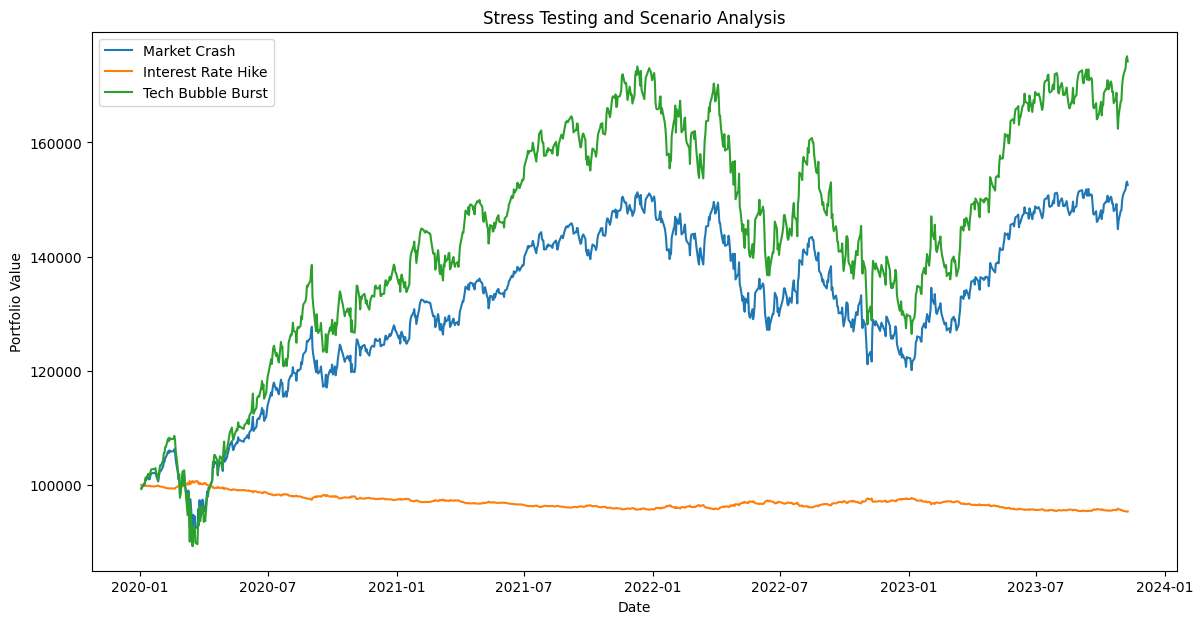

In [ ]:
# Visualizing the scenario analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for scenario in stressed_portfolio_values:
    plt.plot(stressed_portfolio_values_df[scenario], label=scenario)
plt.title('Stress Testing and Scenario Analysis')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()


# Advanced Stress Test Scenarios

* Multi-factor stress scenarios: Stress scenarios might impact various factors like volatility, interest rates, and specific sector performance. These would be reflected in the covariance matrix and mean returns vector used for portfolio simulations.

* Time-varying correlations: Under stress conditions, asset correlations may change. Advanced models might incorporate time-varying correlations that can be estimated from historical periods of stress.

* Monte Carlo simulations: To capture the range of possible outcomes under stress scenarios, we can use Monte Carlo simulations to estimate the distribution of portfolio returns.

* Leverage and liquidation triggers: Adding in leverage and potential liquidation triggers can show how a portfolio might be forced to unwind positions in adverse conditions.

* Regime-switching models: To account for different market regimes (e.g., high volatility vs. low volatility periods), regime-switching models could be employed.

* Tail risk measures: Use of Expected Shortfall (CVaR) and higher moments of distribution (skewness, kurtosis) to assess the tail risk under stress scenarios.

* Liquidity adjustments: Incorporating the cost of liquidation or changes in bid-ask spread under stress.

* Advanced stress testing often requires a deep understanding of the trading strategy and the specific risk factors that affect it.

* Non-Linear Models: Incorporate non-linear models like GARCH (Generalized Autoregressive Conditional Heteroskedasticity) to model volatility clustering and potential fat tails in the distribution of asset returns.

* Extreme Value Theory (EVT): Use EVT to model the tails of the distribution better and assess the impact of extreme but plausible scenarios.

* Historical Scenario Stress Tests: Use historical crises periods (e.g., the 2008 financial crisis, the dot-com bubble burst) as the basis for stress scenarios.

* Machine Learning Techniques: Use machine learning to identify non-linear relationships between market factors and portfolio performance.

* Liquidity Adjustment: Incorporate liquidity metrics into stress tests, adjusting for the impact of large trades on the market price (market impact).

* Counterparty Risk: In strategies that involve leverage or derivatives, factor in the risk of counterparty default under stress conditions.

* Regulatory Constraints and Capital Requirements: Include regulatory capital requirements in the simulation to assess the potential for regulatory-driven selling.

* Stochastic Processes: Incorporate more advanced stochastic processes to simulate price paths, like Levy processes or jump-diffusion models.

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from datetime import datetime



In [ ]:
# Fetch data
tickers = ["AAPL", "MSFT", "GOOG", "AMZN"]
start_date = "2020-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']



[*********************100%%**********************]  4 of 4 completed


In [ ]:
# Calculate returns
returns = data.pct_change().dropna()



In [ ]:
# Portfolio setup
weights = np.array([0.25, 0.25, 0.25, 0.25])  # Evenly distributed for simplicity
initial_investment = 1000000



In [ ]:
# Monte Carlo simulation parameters
simulations = 1000
time_horizon = 252  # Days

# EWMA parameters
lambda_ = 0.94



In [ ]:
# Calculate the exponentially weighted covariance matrix
cov_matrix_ewma = returns.ewm(alpha=(1-lambda_), adjust=False).cov().iloc[-len(tickers):].values

# Make sure it's reshaped properly for a square matrix
cov_matrix_ewma = cov_matrix_ewma.reshape(len(tickers), len(tickers))




In [ ]:
# Scenarios
stress_factor = {
    'Market Crash': 0.5,  # Market loses half its value
    'Interest Rate Hike': -0.05  # Prices drop by 5%
}
scenarios = ['Market Crash', 'Interest Rate Hike']



In [ ]:
def monte_carlo_simulation(returns, cov_matrix, weights, initial_investment, simulations, time_horizon):
    results = np.zeros((simulations, time_horizon))
    mean_returns = returns.mean()

    for i in range(simulations):
        # Generate random price paths
        rand_rets = np.random.multivariate_normal(mean_returns, cov_matrix, time_horizon)
        cum_returns = np.cumprod(1 + rand_rets, axis=0)
        portfolio_value = (cum_returns * weights * initial_investment).sum(axis=1)
        results[i] = portfolio_value

    return results



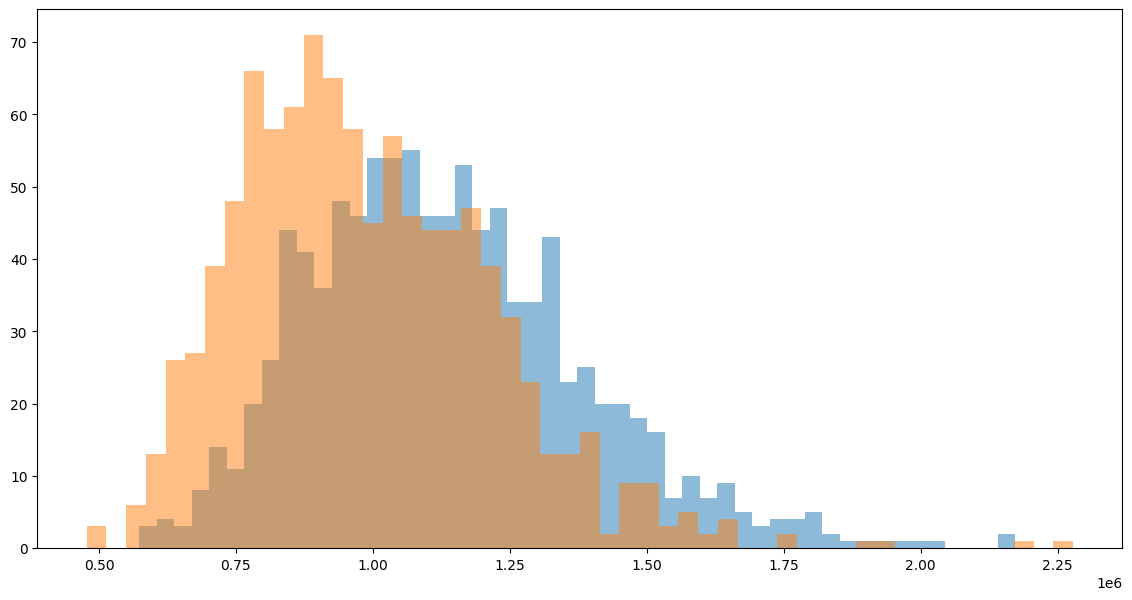

In [ ]:
# Plotting the scenario
plt.figure(figsize=(14, 7))

for scenario in scenarios:
    # Adjust mean returns for the scenario
    adj_returns = returns.copy()
    if scenario in stress_factor:
        adj_returns *= stress_factor[scenario]

    # Run the Monte Carlo simulation
    mc_results = monte_carlo_simulation(adj_returns, cov_matrix_ewma, weights, initial_investment, simulations, time_horizon)

    # Calculating the final values across all simulations
    final_values = mc_results[:, -1]

    # Plot histogram of final portfolio values under this scenario
    plt.hist(final_values, bins=50, alpha=0.5, label=f"Scenario: {scenario}")



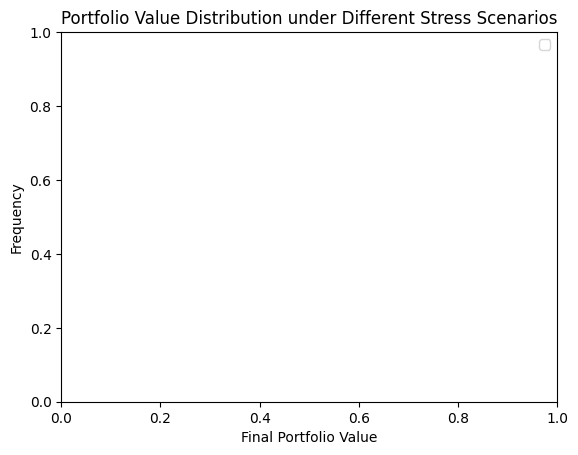

In [ ]:
plt.title('Portfolio Value Distribution under Different Stress Scenarios')
plt.xlabel('Final Portfolio Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
!pip install arch
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from scipy.stats import genextreme as gev



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 9.4 MB/s eta 0:00:00


In [ ]:
# Fetch historical data
tickers = ["AAPL", "MSFT", "GOOG", "AMZN"]
data = yf.download(tickers, start='2010-01-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()



[*********************100%%**********************]  4 of 4 completed


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003178. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002683. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarn

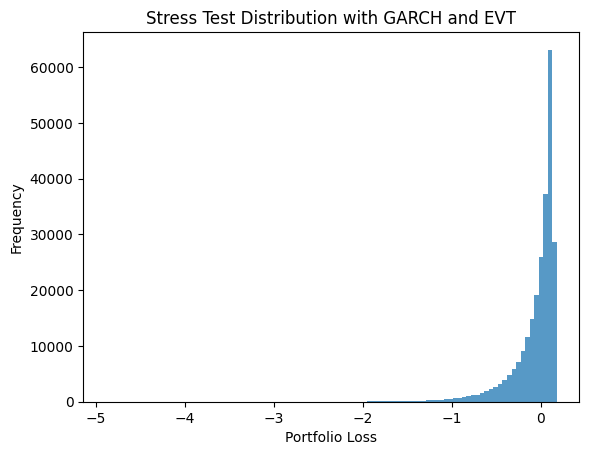

In [ ]:
# Fit a GARCH(1,1) model to the daily returns
garch_models = {}
for ticker in tickers:
    gm = arch_model(returns[ticker], p=1, q=1)
    res = gm.fit(update_freq=10, disp='off')
    garch_models[ticker] = res

# Now, let's simulate future paths
simulated_paths = {}
days = 252  # One year
for ticker, model in garch_models.items():
    forecasts = model.forecast(horizon=days)
    volatilities = forecasts.variance.iloc[-1]**0.5  # Take square root of variance for volatility
    simulated_paths[ticker] = np.random.normal(size=(1000, days)) * volatilities.values

# Implement EVT to model the tail of the distribution of extreme losses
tail_risks = {}
for ticker in tickers:
    # Use the negative returns for EVT
    negative_returns = -returns[ticker].dropna()
    # Fit a GEV model
    c, loc, scale = gev.fit(negative_returns)
    tail_risks[ticker] = gev(c, loc=loc, scale=scale)

# Assume portfolio weights
weights = np.array([0.25, 0.25, 0.25, 0.25])

# Now perform the stress test simulation
portfolio_loss = np.zeros((1000, days))
for i in range(1000):
    for ticker in tickers:
        simulated_returns = simulated_paths[ticker][i, :]
        portfolio_loss[i, :] += weights[tickers.index(ticker)] * simulated_returns

# We can now apply the tail risk measure to the portfolio loss
extreme_losses = gev.rvs(c, loc=loc, scale=scale, size=(1000, days))

# Combine the GARCH simulated paths with the extreme loss tail
combined_stress_test = portfolio_loss + extreme_losses

# Analyze the results
plt.hist(combined_stress_test.flatten(), bins=100, alpha=0.75)
plt.title("Stress Test Distribution with GARCH and EVT")
plt.xlabel("Portfolio Loss")
plt.ylabel("Frequency")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import yfinance as yf

# Download historical data for portfolio assets
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
data = yf.download(tickers, start="2022-01-01", end="2023-01-01")['Adj Close']



[*********************100%%**********************]  4 of 4 completed


In [ ]:
# Assume equal weights for simplicity
weights = np.array([0.25, 0.25, 0.25, 0.25])

# Calculate daily returns
returns = data.pct_change().dropna()



In [ ]:
# Calculate the portfolio's mean and standard deviation of returns
port_mean = np.dot(returns.mean(), weights)
port_std = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))



In [ ]:
# Calculate normal VaR at 95% confidence level
alpha = 0.95
VaR_95 = norm.ppf(1-alpha, port_mean, port_std)



In [ ]:
# Assume a liquidity horizon of 5 days and an adjustment factor
liquidity_horizon = 5
adjustment_factor = 0.2  # This factor would depend on market impact models



In [ ]:
# Calculate the LVaR
LVaR = VaR_95 * np.sqrt(liquidity_horizon) * (1 + adjustment_factor)

print(f"Normal VaR at 95% confidence level: {VaR_95}")
print(f"Liquidity-Adjusted VaR (LVaR) at 95% confidence level: {LVaR}")


Normal VaR at 95% confidence level: -0.5985417547852849
Liquidity-Adjusted VaR (LVaR) at 95% confidence level: -1.6060560612862886


1. **Machine Learning for Predictive Risk Management**
Predictive Analytics: Utilize machine learning models to predict market volatility, correlations, or other risk metrics, such as using LSTM networks to forecast time-series data.
Feature Engineering: Incorporate macroeconomic indicators, market sentiment from news articles or financial reports, and social media analytics to capture a broad range of factors affecting the market.
2. **Multi-Factor Risk Models**
Barra Risk Factor Analysis: Implement a multi-factor risk model like the Barra model, which includes factors like style, sector, and country to estimate risk more accurately.
Custom Risk Factors: Develop proprietary risk factors relevant to your strategy, such as factors derived from order book dynamics or high-frequency trade data.
3. **Advanced Portfolio Construction Techniques**
Black-Litterman Model: Integrate investor views with market equilibrium in the portfolio construction process.
Mean-CVaR Optimization: Replace mean-variance optimization with mean-Conditional Value at Risk optimization to focus on tail risks.
Non-Convex Optimization: Use non-convex optimization for portfolio construction, which can capture more complex risk-return profiles.
4. **High-Frequency Risk Management**
Market Microstructure: Analyze the market microstructure for liquidity risk, incorporating the order book's state and transaction costs in risk assessment.
Intraday Risk Metrics: Calculate intraday Value at Risk (VaR) and Expected Shortfall using high-frequency data.
5. **Advanced Derivatives Pricing Models**
Monte Carlo Simulation for Path-Dependent Options: Use Monte Carlo simulations for pricing complex path-dependent options like Asian or Barrier options.
Local Volatility Models: Use local volatility models for a more accurate estimation of the option prices in the presence of a smile or skew.
6. **Systemic Risk Measurement**
Network Analysis: Utilize network theory to understand and quantify systemic risk in financial networks.
CoVaR (Conditional Value at Risk): Estimate the risk of an asset conditional on the market being in a stressed state.
7. **Liquidity-Adjusted Risk Measures**
Incorporate Illiquidity: Adjust VaR and other risk measures to account for liquidity, potentially using measures like the Amihud illiquidity ratio or turnover.
Dynamic Liquidity Modelling: Model how liquidity changes over time and under stress, possibly with a multi-liquidity factor model.
8. **Advanced Stress Testing**
Reverse Stress Testing: Identify scenarios that could lead to a portfolio's downfall and then determine the likelihood of those scenarios.
Stochastic Scenario Generation: Use stochastic processes to generate realistic adverse scenarios, rather than relying on historical scenarios.
9. **Comprehensive Backtesting Framework**
Regime-Switching Models: Test strategies under different market regimes (e.g., bull vs. bear markets).
Transaction Cost Analysis: Incorporate sophisticated models for slippage and market impact, especially for large trades.


In [ ]:
import yfinance as yf
import time
from datetime import datetime

class StopLossStrategy:
    def __init__(self, ticker, purchase_price, stop_loss_threshold):
        self.ticker = ticker
        self.purchase_price = purchase_price
        self.stop_loss_threshold = stop_loss_threshold
        self.peak_price = purchase_price
        self.stop_loss_price = self.purchase_price * (1 - stop_loss_threshold)
        self.is_position_open = True

    def update_peak_price(self, current_price):
        if current_price > self.peak_price:
            self.peak_price = current_price
            self.update_stop_loss_price()

    def update_stop_loss_price(self):
        self.stop_loss_price = self.peak_price * (1 - self.stop_loss_threshold)

    def check_price_and_sell(self, current_price):
        if current_price <= self.stop_loss_price:
            self.execute_sell(current_price)
            self.is_position_open = False

    def execute_sell(self, current_price):
        # Here you would place a sell order with your broker
        print(f"[{datetime.now()}] Stop loss triggered. Sell at: {current_price:.2f}")

    def monitor_prices(self):
        # This function simulates real-time price monitoring
        while self.is_position_open:
            # Fetch the latest price
            current_price = yf.download(self.ticker, period="1m", interval="1m")['Adj Close'][-1]

            self.update_peak_price(current_price)
            self.check_price_and_sell(current_price)

            # Simulate real-time monitoring by waiting for a minute
            time.sleep(60)

# Usage
ticker = 'AAPL'
purchase_price = 150.00  # Assume a purchase price
stop_loss_threshold = 0.05  # 5% trailing stop-loss

# Instantiate the StopLossStrategy
strategy = StopLossStrategy(ticker, purchase_price, stop_loss_threshold)

# Start monitoring prices
strategy.monitor_prices()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


KeyboardInterrupt: ignored

# Portfolio Rebalancing

* Get Latest Prices: Fetches the latest trading prices of the portfolio assets.
* Calculate Portfolio Value: Computes the current total value of the portfolio and the value of each asset.
* Rebalance Portfolio: Determines how many shares of each asset should be bought or sold to achieve the target allocation.
* Execution: The script runs these functions and prints out the necessary rebalancing trades.
* Transaction Costs: Incorporate transaction costs into the rebalancing calculations.
* Tax Considerations: Add a simplistic model for tax implications due to capital gains or losses.
* Market Condition Adjustments: Introduce conditional logic to modify the target allocations based on market conditions.
* Real-time Data Integration: Simulate using a more realistic data source and setup.
* Asset Correlation Check: Adjust rebalancing based on the current correlation matrix of the assets.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np



[*********************100%%**********************]  4 of 4 completed
Advanced Rebalancing Trades (Buy/Sell in Shares):
 AAPL     4.42
AMZN    62.76
GOOG    44.92
MSFT   -44.81
dtype: float64


In [ ]:
# Define the portfolio stocks, target allocations, and current holdings
portfolio = {'AAPL': 0.30, 'MSFT': 0.20, 'GOOG': 0.20, 'AMZN': 0.30}
current_holdings = {'AAPL': 100, 'MSFT': 80, 'GOOG': 50, 'AMZN': 70}
transaction_cost_rate = 0.001  # 0.1% transaction cost
capital_gains_tax_rate = 0.15  # 15% capital gains tax



In [ ]:
# Fetch historical data
def get_historical_data(tickers, period='1y'):
    return yf.download(tickers, period=period)['Adj Close']



In [ ]:
# Calculate capital gains tax
def calculate_tax(sell_trades, purchase_prices, current_prices):
    gains = (current_prices - purchase_prices) * sell_trades
    tax = gains.apply(lambda x: x * capital_gains_tax_rate if x > 0 else 0)
    return tax



In [ ]:
# Modify allocations based on market conditions (example logic)
def adjust_allocations_based_on_market(data, target_alloc):
    # Implement your logic here. E.g., reduce allocation to stocks if recent volatility is high.
    return target_alloc



In [ ]:
# Rebalance portfolio
def rebalance_portfolio(data, holdings, target_alloc, transaction_costs):
    current_values = data.iloc[-1] * pd.Series(holdings)
    portfolio_value = current_values.sum()
    adjusted_alloc = adjust_allocations_based_on_market(data, target_alloc)
    target_values = portfolio_value * pd.Series(adjusted_alloc)
    diff = target_values - current_values

    # Calculate rebalance trades considering transaction costs
    rebalance_trades = diff / data.iloc[-1]
    rebalance_trades -= rebalance_trades * transaction_costs  # Deduct transaction costs

    return rebalance_trades



In [ ]:
# Main execution
if __name__ == "__main__":
    tickers = list(portfolio.keys())
    historical_data = get_historical_data(tickers)
    purchase_prices = historical_data.iloc[0]  # Simplified assumption

    transaction_costs = transaction_cost_rate
    initial_rebalance_actions = rebalance_portfolio(
        historical_data, current_holdings, portfolio, transaction_costs
    )

    sell_trades = initial_rebalance_actions.clip(lower=0)  # Assuming sell trades are positive
    tax_implications = calculate_tax(sell_trades, purchase_prices, historical_data.iloc[-1])

    # Adjust the initial rebalance actions for tax implications
    rebalance_actions = initial_rebalance_actions - (tax_implications / historical_data.iloc[-1])

    print("Advanced Rebalancing Trades (Buy/Sell in Shares):\n", rebalance_actions.round(2))
